### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측 
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
   지니지수는 얼마나 불확실한가(얼마나 많은 것들이 섞여있는가?)를 보여주며 지니지수가 0이라는 것은 불확실성이 0이다 라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

https://injo.tistory.com/15


- 질문 : 다양성이 높을수록 균일도가 높은거 아닌가요?  지니계수가 낮은 속성을 기준으로 분할하는게 아닌가요?
- 지니계수가 낮을수록 균일도가 높다
- 평등할수록 균일도가 높아지잖아  0에서 평등 1에서 불평등이잖아 그러면 균일도가 높을수록 지니계수가 낮아야되는거아닌가요?
- 순도, 불순도로 주로 쓰이는거 같다.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
dt_clf = DecisionTreeClassifier(random_state=156)
# pruning(가지치기) = 마지막 leaf노드들이 root노드까지 바로 가는데 걸리는 조건의 개수인 깊이를 제한
#dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
#dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)
#dt_clf = DecisionTreeClassifier(criterion='gini', min_sample_split=4, random_state=156)
#dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=4, random_state=156)
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
clf_report = classification_report(y_test, pred)

print(f'결정트리예측정확도: {accuracy:.4f}','\n')
print(f'classification report: {clf_report}')

결정트리예측정확도: 0.9333 

classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



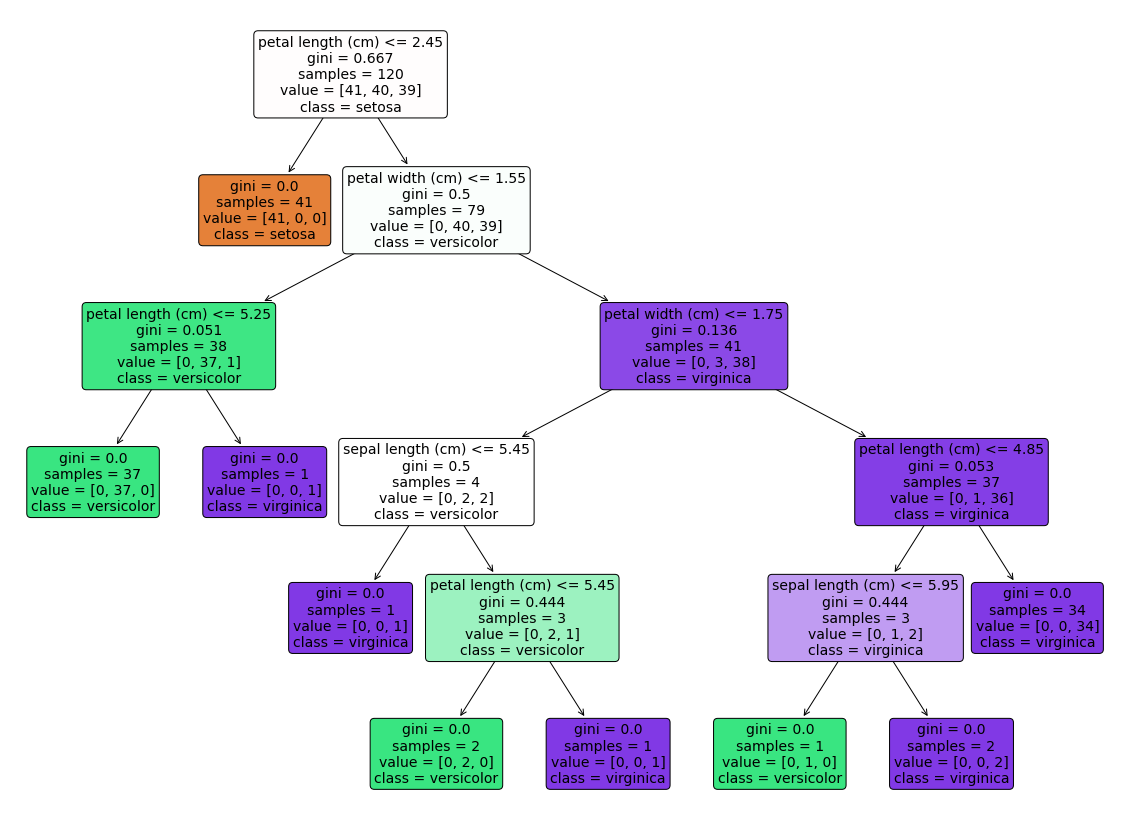

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True,
              feature_names= iris_data.feature_names,
              class_names = iris_data.target_names,
               rounded=True, fontsize=14)
plt.show()
plt.close()

설치방법

https://kbj96.tistory.com/26

In [4]:
!pip install graphviz

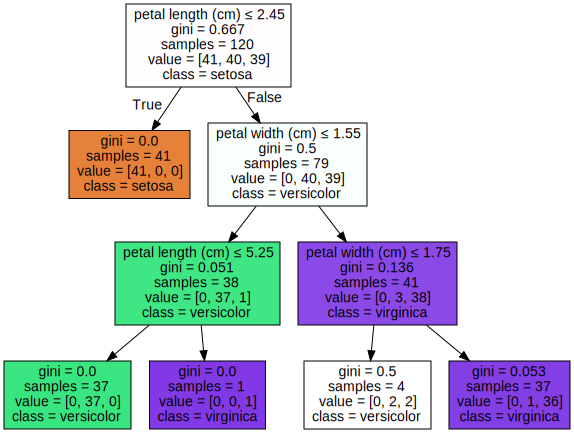

In [6]:
import graphviz

dot_data = tree.export_graphviz(dt_clf,
                               out_file = None,
                               feature_names = iris_data.feature_names,
                               class_names = iris_data.target_names,
                               filled = True,
                               special_characters = True)
graphviz.Source(dot_data)

Feature importances: 
[0.025 0.    0.555 0.42 ] 

sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

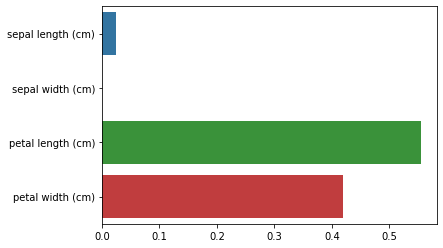

In [33]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print(f'Feature importances: \n{np.round(dt_clf.feature_importances_,3)}','\n')

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name}:{value:.3f}')
    
# feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

### 결정 트리 실습 - Human Activity Recognition

### [과제]
'dataset/human_activity' 폴더의 데이터들을 불러와서 다음을 수행하세요.
- 학습용 평가용 데이터셋 추출  (완료)
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
feature_name_df = pd.read_csv('dataset/human_activity/features.txt', sep='\s+', header=None,\
                               names=['column_index','column_name'])

print(feature_name_df.head())
feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

   column_index        column_name
0             1  tBodyAcc-mean()-X
1             2  tBodyAcc-mean()-Y
2             3  tBodyAcc-mean()-Z
3             4   tBodyAcc-std()-X
4             5   tBodyAcc-std()-Y
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
def get_human_dataset():
    feature_name_df = pd.read_csv('dataset/human_activity/features.txt', sep='\s+', header=None,\
                               names=['column_index','column_name'])


    feature_name = feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('dataset/human_activity/train/X_train.txt', sep='\s+', header=None)
    X_train.columns = feature_name
    X_test = pd.read_csv('dataset/human_activity/test/X_test.txt', sep='\s+', header=None)
    X_test.columns = feature_name
    
    y_train = pd.read_csv('dataset/human_activity/train/y_train.txt', sep='\s+', header = None, names=['action'])
    y_test = pd.read_csv('dataset/human_activity/test/y_test.txt', sep='\s+', header = None, names=['action'])
    
    return X_train, X_test, y_train,y_test
X_train, X_test, y_train, y_test = get_human_dataset()

In [3]:
y_test.head()

,action
0,5
1,5
2,5
3,5
4,5


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [14]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [15]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [4]:
# 동작 예측 분류 실행  하이퍼 파라미터는 모두 디폴트 값으로 설정 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('DecisiontreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

# 85%의 정확도 

결정 트리 예측 정확도: 0.8548
DecisiontreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [5]:
# 결정트리의 트리 깊이가 예측정확도에 주는 영향 
# 결정트리의 깊이를 조절하는 하이퍼 파라미터값 변화 

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [ 6, 8, 10, 12, 14, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring = 'accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8512
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10}


In [6]:
# max_depth따른 평가 데이터 세트의 평균 정확도 수치값 

import pandas as pd
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,14,0.847808
5,20,0.850800
6,24,0.849440


In [7]:
# 데이터 세트에서 결정 트리의 정확도 (별도)

max_depths =[ 6, 8, 10, 12, 14, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuraccy = accuracy_score(y_test,pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth,accuracy))
    
#깊이가 길수록  정확도가 떨어져야되는데....  깊이가 깊어질수록 과적합의 영향이 커진다

max_depth = 6 정확도: 0.8548
max_depth = 8 정확도: 0.8548
max_depth = 10 정확도: 0.8548
max_depth = 12 정확도: 0.8548
max_depth = 14 정확도: 0.8548
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [8]:
params = {
    'max_depth':[8, 12, 14, 20],
    'min_samples_split': [14,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8553
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 14}


In [28]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8728


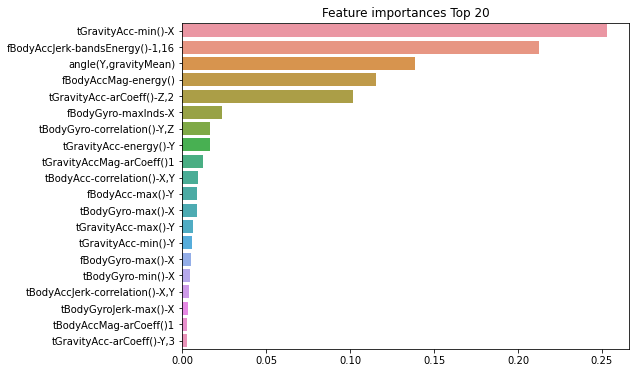

In [29]:
# 중요도가 높은순으로 top 20 vlrcu
import seaborn as sns
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()